<a href="https://colab.research.google.com/github/ym001/distancia/blob/master/notebook/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install distancia==0.0.33

from distancia import Euclidean, Manhattan

print(Euclidean().calculate([2,3], [3,4]))
print(Manhattan().calculate([2,3], [3,4]))


1.4142135623730951
2


In [46]:
from distancia import ShortestPath

# Define a graph using a dictionary
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Initialize the ShortestPath class with the graph
shortest_path_calculator = ShortestPath()

# Compute the shortest path distance between nodes 'A' and 'D'
distance = shortest_path_calculator.calculate(graph,'A', 'D')
print(f"The shortest path distance between A and D is: {distance}")

The shortest path distance between A and D is: 4


In [47]:
from distancia import GraphEditDistance

graph1 = {
    'A': {'B', 'C'},
    'B': {'A', 'C'},
    'C': {'A', 'B'}
}

graph2 = {
    'A': {'B'},
    'B': {'A', 'D'},
    'C': {'D'},
    'D': {'B', 'C'}
}

ged_calculator = GraphEditDistance()
distance = ged_calculator.calculate(graph1, graph2)
print(f"The Graph Edit Distance between the two graphs is: {distance}")


The Graph Edit Distance between the two graphs is: 5


In [48]:
from distancia import SpectralDistance
import networkx as nx

def create_sample_graphs():
    # Create a path graph
    P10 = nx.path_graph(10)

    # Create a cycle graph
    C10 = nx.cycle_graph(10)

    # Create a complete graph
    K10 = nx.complete_graph(10)

    # Create two random graphs
    G1 = nx.gnm_random_graph(10, 20)
    G2 = nx.gnm_random_graph(10, 20)

    return P10, C10, K10, G1, G2

def compare_graphs(graphs, names):
    # Initialize SpectralDistance object
    sd = SpectralDistance(k=5, normalized=True)

    print("Spectral distances between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            distance = sd.calculate(G1, G2)
            print(f"{name1} vs {name2}: {distance:.4f}")

def main():
    # Create sample graphs
    P10, C10, K10, G1, G2 = create_sample_graphs()
    graph_names = ["Path", "Cycle", "Complete", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([P10, C10, K10, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Spectral distances between graphs:
Path vs Cycle: 1.0351
Path vs Complete: 1.0969
Path vs Random1: 0.6702
Path vs Random2: 0.6875
Cycle vs Complete: 1.9245
Cycle vs Random1: 1.5474
Cycle vs Random2: 1.4647
Complete vs Random1: 0.7354
Complete vs Random2: 0.8046
Random1 vs Random2: 0.1670


In [49]:
import networkx as nx

from distancia import WeisfeilerLehmanSimilarity

def create_sample_graphs():
    # Create a cycle graph
    C5 = nx.cycle_graph(5)

    # Create a path graph
    P5 = nx.path_graph(5)

    # Create a complete graph
    K5 = nx.complete_graph(5)

    # Create a star graph
    S5 = nx.star_graph(4)

    # Create two random graphs
    G1 = nx.gnm_random_graph(5, 7)
    G2 = nx.gnm_random_graph(5, 7)

    return C5, P5, K5, S5, G1, G2

def compare_graphs(graphs, names):
    # Initialize WeisfeilerLehmanSimilarity object
    wl = WeisfeilerLehmanSimilarity(num_iterations=3)

    print("Weisfeiler-Lehman similarities between graphs:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            similarity = wl.calculate(G1, G2)
            print(f"{name1} vs {name2}: {similarity:.4f}")

        # Check for potential isomorphism with itself (should always be true)
        is_iso = wl.is_isomorphic(G1, G1)
        print(f"Is {name1} isomorphic to itself? {is_iso}")

    # Check for potential isomorphism between different graphs
    print("\nChecking for potential isomorphism:")
    for i, (G1, name1) in enumerate(zip(graphs, names)):
        for j, (G2, name2) in enumerate(zip(graphs[i+1:], names[i+1:])):
            is_iso = wl.is_isomorphic(G1, G2)
            print(f"Are {name1} and {name2} potentially isomorphic? {is_iso}")

def main():
    # Create sample graphs
    C5, P5, K5, S5, G1, G2 = create_sample_graphs()
    graph_names = ["Cycle", "Path", "Complete", "Star", "Random1", "Random2"]

    # Compare the graphs
    compare_graphs([C5, P5, K5, S5, G1, G2], graph_names)

if __name__ == "__main__":
    main()

Weisfeiler-Lehman similarities between graphs:
Cycle vs Path: 0.3849
Cycle vs Complete: 0.2500
Cycle vs Star: 0.2500
Cycle vs Random1: 0.3125
Cycle vs Random2: 0.3125
Is Cycle isomorphic to itself? True
Path vs Complete: 0.2500
Path vs Star: 0.3125
Path vs Random1: 0.3125
Path vs Random2: 0.3125
Is Path isomorphic to itself? True
Complete vs Star: 0.2778
Complete vs Random1: 0.2778
Complete vs Random2: 0.2778
Is Complete isomorphic to itself? True
Star vs Random1: 0.2778
Star vs Random2: 0.2778
Is Star isomorphic to itself? True
Random1 vs Random2: 1.0000
Is Random1 isomorphic to itself? True
Is Random2 isomorphic to itself? True

Checking for potential isomorphism:
Are Cycle and Path potentially isomorphic? False
Are Cycle and Complete potentially isomorphic? False
Are Cycle and Star potentially isomorphic? False
Are Cycle and Random1 potentially isomorphic? False
Are Cycle and Random2 potentially isomorphic? False
Are Path and Complete potentially isomorphic? False
Are Path and Star 

L1 distance between stationary distributions: 0.1300
L2 distance between stationary distributions: 0.0436
KL divergence between stationary distributions: 0.0095

Results for graph1:
Average walk length: 20.00
Node visit frequencies:
  Node 0: 0.1225
  Node 1: 0.1453
  Node 2: 0.1191
  Node 3: 0.1150
  Node 4: 0.0329
  Node 5: 0.0635
  Node 6: 0.0858
  Node 7: 0.0828
  Node 8: 0.0886
  Node 9: 0.1447

Results for graph2:
Average walk length: 20.00
Node visit frequencies:
  Node 0: 0.1085
  Node 1: 0.1277
  Node 2: 0.1293
  Node 3: 0.1320
  Node 4: 0.0321
  Node 5: 0.0788
  Node 6: 0.0779
  Node 7: 0.0804
  Node 8: 0.1064
  Node 9: 0.1270


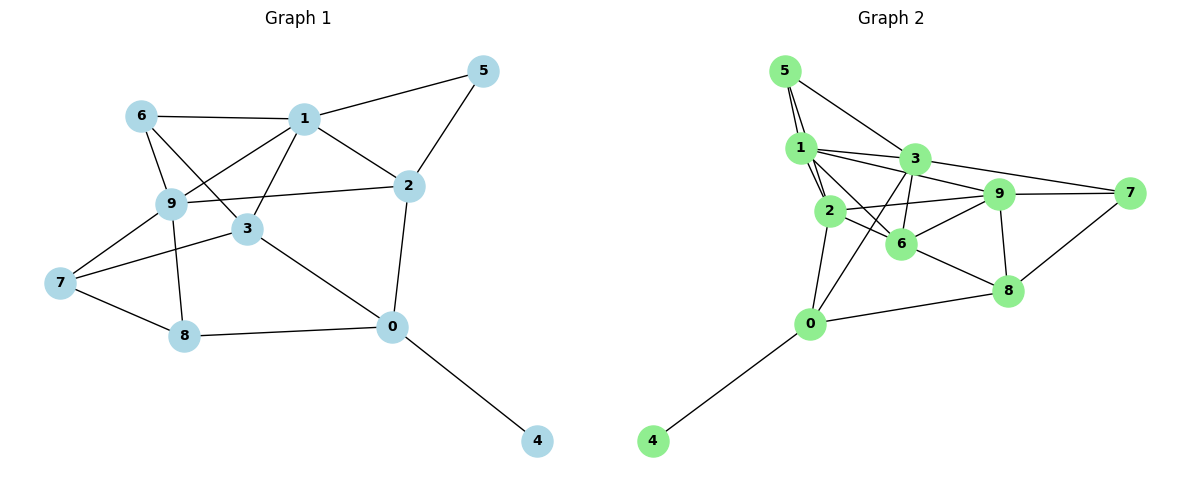

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from distancia import ComparingRandomWalkStationaryDistributions

# Create two similar but slightly different graphs
G1 = nx.erdos_renyi_graph(10, 0.3, seed=42)
G2 = nx.erdos_renyi_graph(10, 0.35, seed=42)

# Initialize the Distance object
distance = ComparingRandomWalkStationaryDistributions(G1, G2)

# Compare the stationary distributions
l1_distance = distance.compare_distributions(metric='l1')
l2_distance = distance.compare_distributions(metric='l2')
kl_distance = distance.compare_distributions(metric='kl')

print(f"L1 distance between stationary distributions: {l1_distance:.4f}")
print(f"L2 distance between stationary distributions: {l2_distance:.4f}")
print(f"KL divergence between stationary distributions: {kl_distance:.4f}")

# Compare random walks
walk_comparison = distance.compare_random_walks(num_walks=1000, walk_length=20)

# Print results
for graph_name, results in walk_comparison.items():
    print(f"\nResults for {graph_name}:")
    print(f"Average walk length: {results['avg_walk_length']:.2f}")
    print("Node visit frequencies:")
    for node, freq in results['node_visit_frequencies'].items():
        print(f"  Node {node}: {freq:.4f}")

# Visualize the graphs
plt.figure(figsize=(12, 5))

plt.subplot(121)
nx.draw(G1, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph 1")

plt.subplot(122)
nx.draw(G2, with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold')
plt.title("Graph 2")

plt.tight_layout()
plt.show()

In [51]:
import networkx as nx
from distancia import DiffusionDistance

# Créer deux graphes
G1 = nx.erdos_renyi_graph(10, 0.3, seed=42)
G2 = nx.erdos_renyi_graph(10, 0.35, seed=42)

# Initialiser l'objet DiffusionDistance
diffusion_distance = DiffusionDistance(G1, G2)

# Comparer les processus de diffusion
source_node = 0
steps = 5
l1_distance = diffusion_distance.compare_diffusion(source_node, steps, metric='l1')
l2_distance = diffusion_distance.compare_diffusion(source_node, steps, metric='l2')

print(f"L1 distance between diffusion processes: {l1_distance:.4f}")
print(f"L2 distance between diffusion processes: {l2_distance:.4f}")

L1 distance between diffusion processes: 557124462311584.2500
L2 distance between diffusion processes: 186791387234450.2188


In [52]:
# Example usage
from distancia import GraphKernelDistance
edges1 = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "A")]
nodes1 = ["A", "B", "C", "D"]

edges2 = [("A", "B"), ("B", "C"), ("C", "D")]
nodes2 = ["A", "B", "C", "D"]

graph1 = Graph(nodes1, edges1)
graph2 = Graph(nodes2, edges2)

kernel_distance = GraphKernelDistance(graph1, graph2)
distance = kernel_distance.compute(method="random_walk", depth=3)

print(f"The Graph Kernel Distance between the two graphs is: {distance}")


The Graph Kernel Distance between the two graphs is: 0.001949317738791423


In [53]:


# Exemple d'utilisation
from distancia import FrobeniusDistance
class Graph:
    def __init__(self, nodes, edges):
        self.nodes = nodes
        self.edges = edges
        self.adjacency_matrix = self.create_adjacency_matrix()
        self.adjacency_list = self.create_adjacency_list()

    def create_adjacency_matrix(self):
        matrix = [[0 for _ in range(len(self.nodes))] for _ in range(len(self.nodes))]
        node_index = {node: i for i, node in enumerate(self.nodes)}

        for edge in self.edges:
            i, j = node_index[edge[0]], node_index[edge[1]]
            matrix[i][j] = 1
            matrix[j][i] = 1  # Assuming the graph is undirected

        return matrix

    def create_adjacency_list(self):
        adj_list = {node: [] for node in self.nodes}
        for edge in self.edges:
            u, v = edge
            adj_list[u].append(v)
            adj_list[v].append(u)  # Assuming the graph is undirected
        return adj_list

    def count_motifs(self, motif_size):
        motifs = {}
        for node in self.nodes:
            neighbors = self.adjacency_list[node]
            if len(neighbors) >= motif_size - 1:
                for sub_motif in self._find_sub_motifs(node, neighbors, motif_size - 1):
                    sub_motif = tuple(sorted(sub_motif))
                    if sub_motif in motifs:
                        motifs[sub_motif] += 1
                    else:
                        motifs[sub_motif] = 1
        return motifs

    def _find_sub_motifs(self, node, neighbors, remaining):
        if remaining == 1:
            return [(node, neighbor) for neighbor in neighbors]
        sub_motifs = []
        for i, neighbor in enumerate(neighbors):
            new_neighbors = neighbors[i + 1:]
            for sub_motif in self._find_sub_motifs(neighbor, new_neighbors, remaining - 1):
                sub_motifs.append((node,) + sub_motif)
        return sub_motifs

    def get_nodes(self):
        nodes = set()
        for edge in self.edges:
            nodes.update(edge)
        return list(nodes)
nodes1 = ["A", "B", "C"]
edges1 = [("A", "B"), ("B", "C")]

nodes2 = ["A", "B", "C"]
edges2 = [("A", "B"), ("A", "C")]

graph1 = Graph(nodes1, edges1)
graph2 = Graph(nodes2, edges2)
print(graph1.adjacency_matrix)
frobenius_distance = FrobeniusDistance(graph1, graph2)
distance = frobenius_distance.compute()

print(f"La distance de Frobenius entre les deux graphes est: {distance}")


[[0, 1, 0], [1, 0, 1], [0, 1, 0]]
La distance de Frobenius entre les deux graphes est: 2.0


In [54]:


from distancia import PatternBasedDistance

# Exemple d'utilisation
nodes1 = ["A", "B", "C", "D"]
edges1 = [("A", "B"), ("B", "C"), ("C", "A"), ("A", "D")]

nodes2 = ["A", "B", "C", "D"]
edges2 = [("A", "B"), ("B", "D"), ("D", "A"), ("A", "C")]

graph1 = Graph(nodes1, edges1)
graph2 = Graph(nodes2, edges2)

pattern_distance = PatternBasedDistance(graph1, graph2, motif_size=3)
distance = pattern_distance.compute()

print(f"La distance basée sur les motifs entre les deux graphes est: {distance}")


La distance basée sur les motifs entre les deux graphes est: 4


Explication :
Graph Class : Cette classe représente un graphe avec ses nœuds et ses arêtes. Elle génère également une liste d'adjacence associée.

create_adjacency_list : Crée une liste d'adjacence à partir des nœuds et des arêtes du graphe.
count_motifs : Compte la fréquence des motifs de taille donnée (par exemple, des triangles ou des chemins de longueur donnée) dans le graphe.
_find_sub_motifs : Trouve les sous-motifs d'une taille spécifique en explorant les voisins des nœuds.
PatternBasedDistance Class : Cette classe est responsable du calcul de la distance basée sur les motifs entre deux graphes.

compute : Cette méthode compare les motifs présents dans les deux graphes et calcule une distance basée sur la différence des fréquences des motifs.
_calculate_distance : Cette méthode calcule la somme des différences absolues entre les fréquences des motifs communs ou distincts dans les deux graphes.


In [55]:
import zlib

from distancia import GraphCompressionDistance

# Example usage:
graph1 = [
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0]
]

graph2 = [
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
]

distance_calculator = GraphCompressionDistance(graph1, graph2)
distance = distance_calculator.compression_distance()
print(f"Graph Compression Distance: {distance}")


Graph Compression Distance: 3


In [56]:
from distancia import DegreeDistributionDistance

# Représentation de deux graphes sous forme de listes d'adjacence

# Premier graphe (graph1)
# Le graphe est représenté comme un dictionnaire où chaque clé est un nœud et chaque valeur est une liste de voisins.
graph1 = {
    'A': ['B', 'C'],       # Le nœud 'A' est connecté à 'B' et 'C'
    'B': ['A', 'C'],       # Le nœud 'B' est connecté à 'A' et 'C'
    'C': ['A', 'B', 'D'],  # Le nœud 'C' est connecté à 'A', 'B' et 'D'
    'D': ['C']             # Le nœud 'D' est connecté à 'C'
}

# Deuxième graphe (graph2)
graph2 = {
    'A': ['B'],            # Le nœud 'A' est connecté à 'B'
    'B': ['A', 'C', 'D'],  # Le nœud 'B' est connecté à 'A', 'C' et 'D'
    'C': ['B'],            # Le nœud 'C' est connecté à 'B'
    'D': ['B']             # Le nœud 'D' est connecté à 'B'
}

# Instanciation de la classe DegreeDistributionDistance avec les deux graphes
distance_calculator = DegreeDistributionDistance(graph1, graph2)

# Calcul de la distance entre les distributions de degré des deux graphes
distance = distance_calculator.compute_distance()

# Affichage du résultat
print("Distance basée sur les distributions de degré :", distance)



Distance basée sur les distributions de degré : 4.0


In [57]:
import networkx as nx

from distancia import CommunityStructureDistance

import networkx as nx
from community import community_louvain

# Exemple de détection des communautés utilisant l'algorithme de Louvain
def louvain_community_detection(graph):
    """
    Utilise l'algorithme de Louvain pour détecter les communautés dans un graphe.

    :param graph: Le graphe d'entrée.
    :return: Une liste de ensembles, où chaque ensemble représente une communauté.
    """
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, comm_id in partition.items():
        if comm_id not in communities:
            communities[comm_id] = set()
        communities[comm_id].add(node)
    return list(communities.values())

# Créer deux graphes différents
graph1 = nx.karate_club_graph()  # Exemple de graphe 1

# Créer une copie de graph1 et ajouter des modifications pour changer la structure des communautés
graph2 = graph1.copy()
graph2.add_edge(0, 1)  # Ajout d'une arête entre deux nœuds dans différentes communautés
graph2.add_edge(2, 3)  # Ajout d'une arête entre deux nœuds dans différentes communautés

# Initialiser la classe de distance avec la détection de communautés de Louvain
distance_calculator = CommunityStructureDistance(louvain_community_detection)

# Calculer la distance entre les structures de communauté des deux graphes
distance = distance_calculator.distance(graph1, graph2)

print(f"The community structure distance between the two graphs is: {distance}")


The community structure distance between the two graphs is: 0.11904761904761907
